# Fashion MNIST with Keras
## <i>from Google Machine Learning Crash Course</i>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [50]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [51]:
train_images = train_images / 255.0
test_images = test_images / 255.0

(60000, 28, 28)

In [52]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

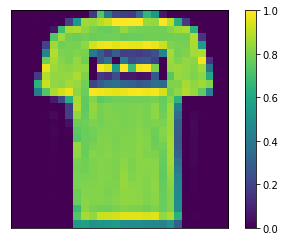

In [110]:
#plt.figure()
plt.imshow(train_images[1])
plt.colorbar()

plt.xticks([])
plt.yticks([])

plt.grid(False)
plt.show()

In [125]:
keras.backend.clear_session()

In [83]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [84]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4969 - accuracy: 0.8241
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3761 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3393 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3124 - accuracy: 0.8853
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2944 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2797 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2681 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2568 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2473 - accuracy: 0.9079
Epoch 10/10
60

In [86]:
predictions = model.predict(test_images)

In [87]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

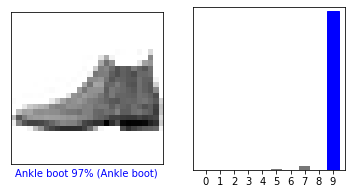

In [88]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

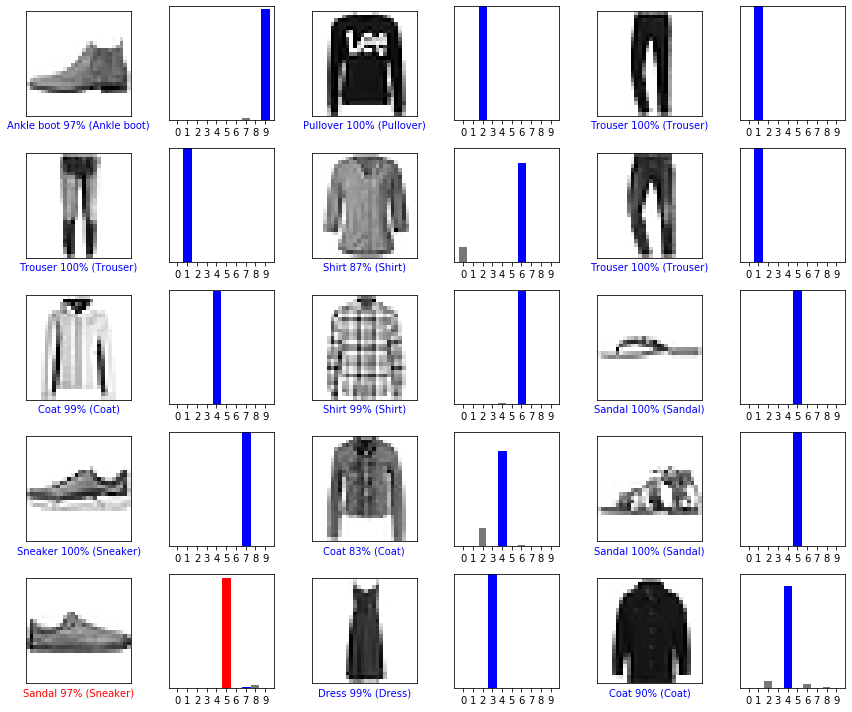

In [90]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [91]:
predictions_argmax = [np.argmax(i) for i in predictions]

In [92]:
print(metrics.accuracy_score(test_labels, predictions_argmax))

0.88
